In [ ]:
import numpy as np

import soundscapy as sspy
from soundscapy.spi import MultiSkewNorm
from soundscapy.surveys.survey_utils import LANGUAGE_ANGLES, PAQ_IDS

data = sspy.isd.load()
data, excl_data = sspy.isd.validate(data)
data = data.query("Language != 'cmn'")

excl_id = [652, 706, 548, 550, 551, 553, 569, 580, 609, 618, 623, 636, 643]
data = data.drop(excl_id)

In [24]:
for lang in data.Language.unique():
    angles = LANGUAGE_ANGLES[lang]

    lang_idx = data.query(f"Language == '{lang}'").index
    iso_pl, iso_ev = sspy.surveys.processing.calculate_iso_coords(
        data.loc[lang_idx, PAQ_IDS], (1, 5), angles
    )
    data.loc[lang_idx, "ISOPleasant"] = round(iso_pl, 3)
    data.loc[lang_idx, "ISOEventful"] = round(iso_ev, 3)

data.head()

,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,THD_THD_Max,THD_Min_Max,THD_Max_Max,THD_L5_Max,THD_L10_Max,THD_L50_Max,THD_L90_Max,THD_L95_Max,ISOPleasant,ISOEventful
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.0,-10.29,0.315,-0.083
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.0,-10.29,-0.337,0.529
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.3,-17.33,0.764,0.075
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.3,-17.33,0.716,-0.019
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.3,-17.33,0.594,-0.042


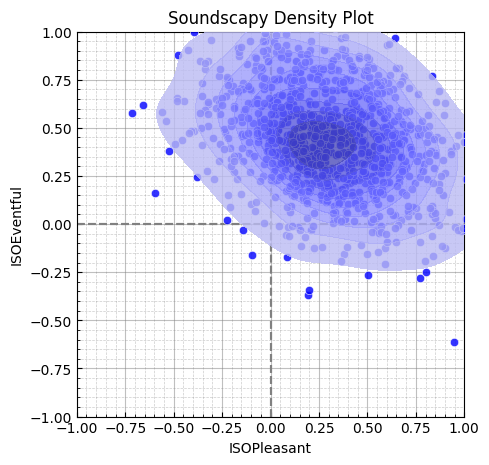

In [25]:
ct = data.query("LocationID == 'SanMarco'")
x = ct["ISOPleasant"].values
y = ct["ISOEventful"].values

msn = MultiSkewNorm()
msn.fit(data=ct[["ISOPleasant", "ISOEventful"]])
msn.summary()
msn.sspy_plot()

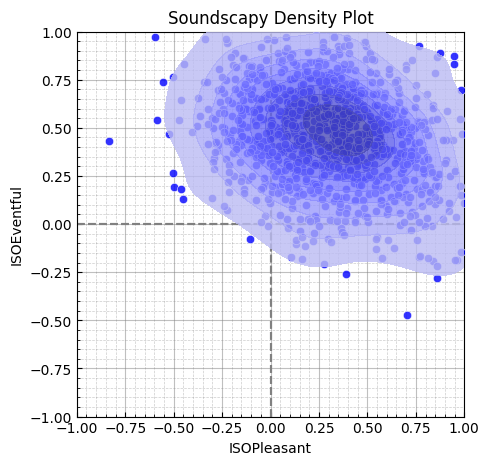

In [26]:
msn2 = MultiSkewNorm()
msn2.define_dp(
    xi=np.array([0.06534, 0.628637]),
    omega=np.array([[0.14890315, -0.06423752], [-0.06423752, 0.10139612]]),
    alpha=np.array([0.79105, -0.767217]),
)
msn2.sample(n=1000, return_sample=True)
msn2.summary()
msn2.sspy_plot()